In [1]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
#df = pd.DataFrame(data, index=index, columns=columns)
iris.data
cols=['sep_len', 'sep_wid', 'pet_len', 'pet_wid']
df_iris=pd.DataFrame(iris.data, columns=cols)

df_iris['target']=iris.target
df_iris.head()

,sep_len,sep_wid,pet_len,pet_wid,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
#iris.data[:,0]
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

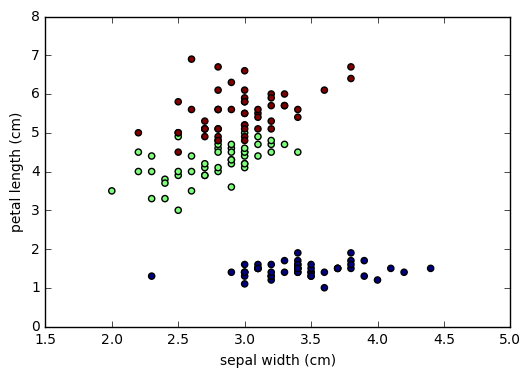

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#Scatter taking two features
plt.scatter(iris.data[:, 1], iris.data[:,2], c=iris.target)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])

In [8]:
#iris.target

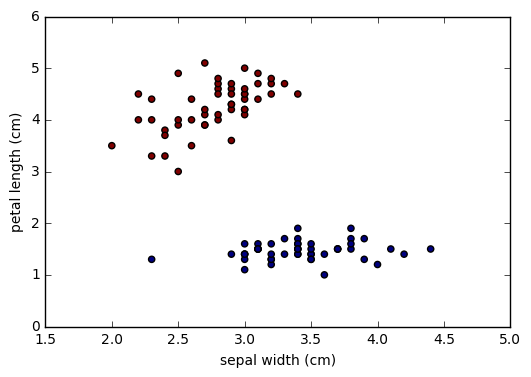

In [12]:
#Taking only two classes to work with
plt.scatter(iris.data[0:100, 1], iris.data[0:100,2], c=iris.target[0:100])
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])

In [13]:
#Fitting the model with C=2 for slighly wider margin
#Only 2 classes/species are taken here
from sklearn import svm
svc=svm.SVC(kernel='linear', C=2 )
from sklearn import datasets
X = iris.data[0:100, 1:3]
y=iris.target[0:100]
svc.fit(X, y)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
#paints a map
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
 

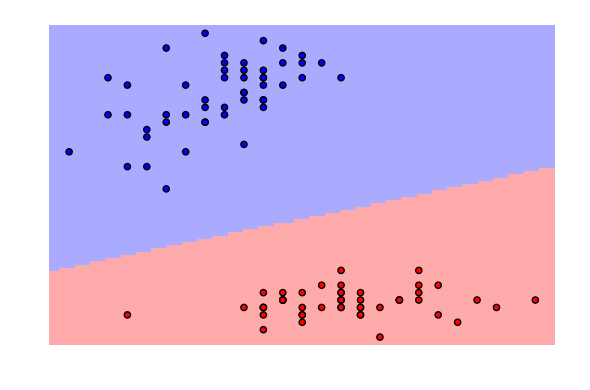

In [15]:
import numpy as np
def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    Z=estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #put result into color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    #plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()
    
plot_estimator(svc, X, y)



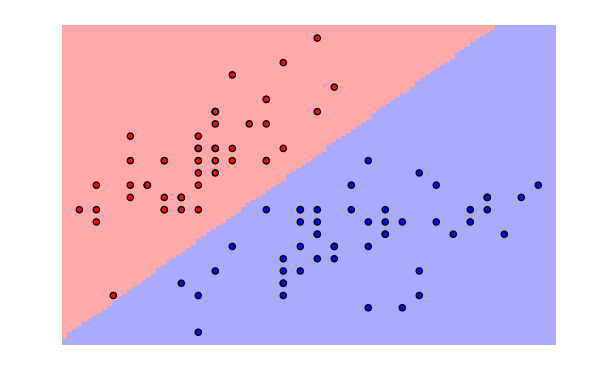

In [17]:
#Using models for other features
X = iris.data[0:100, 0:2]  #first 100 rows 1 and 2 ie sep_len and sep_wid for setosa and versicolor
y=iris.target[0:100]
svc.fit(X, y)
plot_estimator(svc, X, y)

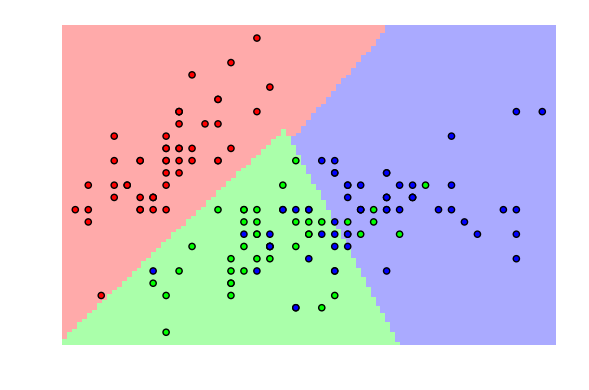

In [18]:
#Using models for all 3 classes
#All rows 1 and 2 ie sep_len and sep_wid for setosa and versicolor and verginica
X = iris.data[0:150, 0:2]  
y=iris.target[0:150]
svc.fit(X, y)
plot_estimator(svc, X, y)

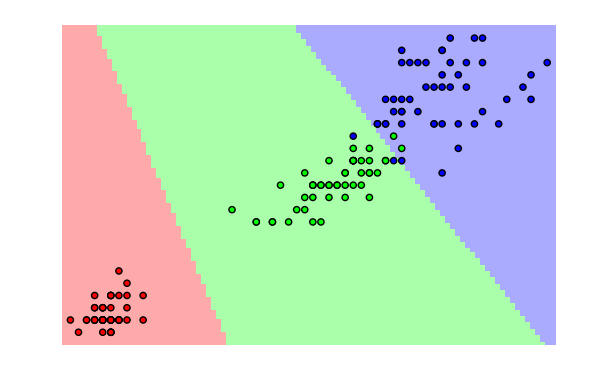

In [19]:
#Applying model for different features
X = iris.data[0:150, 2:4]  #All rows 2 and 2 ie pet_len and pet_wid for setosa and versicolor and verginica
y=iris.target[0:150]
svc.fit(X, y)
plot_estimator(svc, X, y)

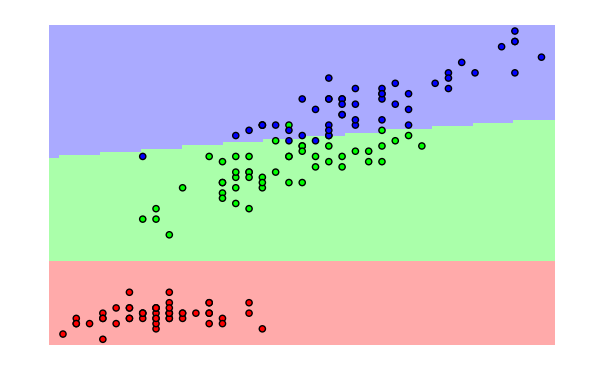

In [20]:
#data[:, [1, 9]]
X = iris.data[0:150, [0, 2]]  #All rows 1 and 2 ie sep_len and pet_len for setosa and versicolor
y=iris.target[0:150]
svc.fit(X, y)
plot_estimator(svc, X, y)

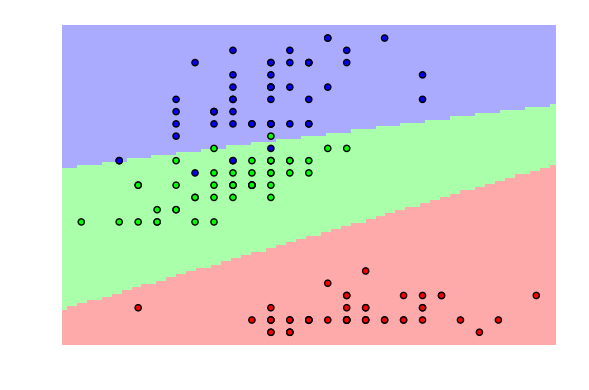

In [21]:
#data[:, [1, 9]]
X = iris.data[0:150, [1, 3]]  #All rows 1 and 2 ie sep_wid and pet_len for setosa and versicolor
y=iris.target[0:150]
svc.fit(X, y)
plot_estimator(svc, X, y)

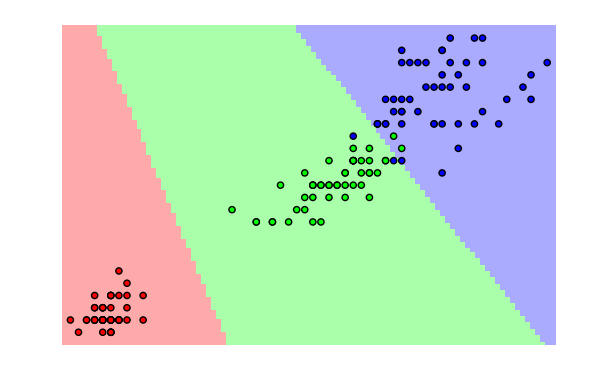

In [22]:
#data[:, [1, 9]]
X = iris.data[0:150, [2, 3]]  #All rows 1 and 2 ie pet_wid and pet_len for setosa and versicolor
y=iris.target[0:150]
svc.fit(X, y)
plot_estimator(svc, X, y)

Summary: SVC is able to seperate well all three species, some combinations work better than other. Accuracy, precision, recall, f1 etc to be tested in new data.

In [24]:
#working in dataframe

svc=svm.SVC(kernel='linear', C=2 )
X1=df_iris.ix[0:150,['sep_wid', 'pet_len']]
y1=df_iris.ix[0:150, ['target']]
svc.fit(X1, y1)


C:\Users\Mnsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
#X1.ix[:, 0]

In [26]:
def plot_estimator_df(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X.ix[:, 0].min() - .1, X.ix[:, 1].max() + .1
    y_min, y_max = X.ix[:, 0].min() - .1, X.ix[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150),
                        np.linspace(y_min, y_max, 150))
    
    Z=estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #put result into color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 12))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    #plot also the training points
    plt.scatter(X.ix[:, 0], X.ix[:, 1], c = y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()

C:\Users\Mnsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


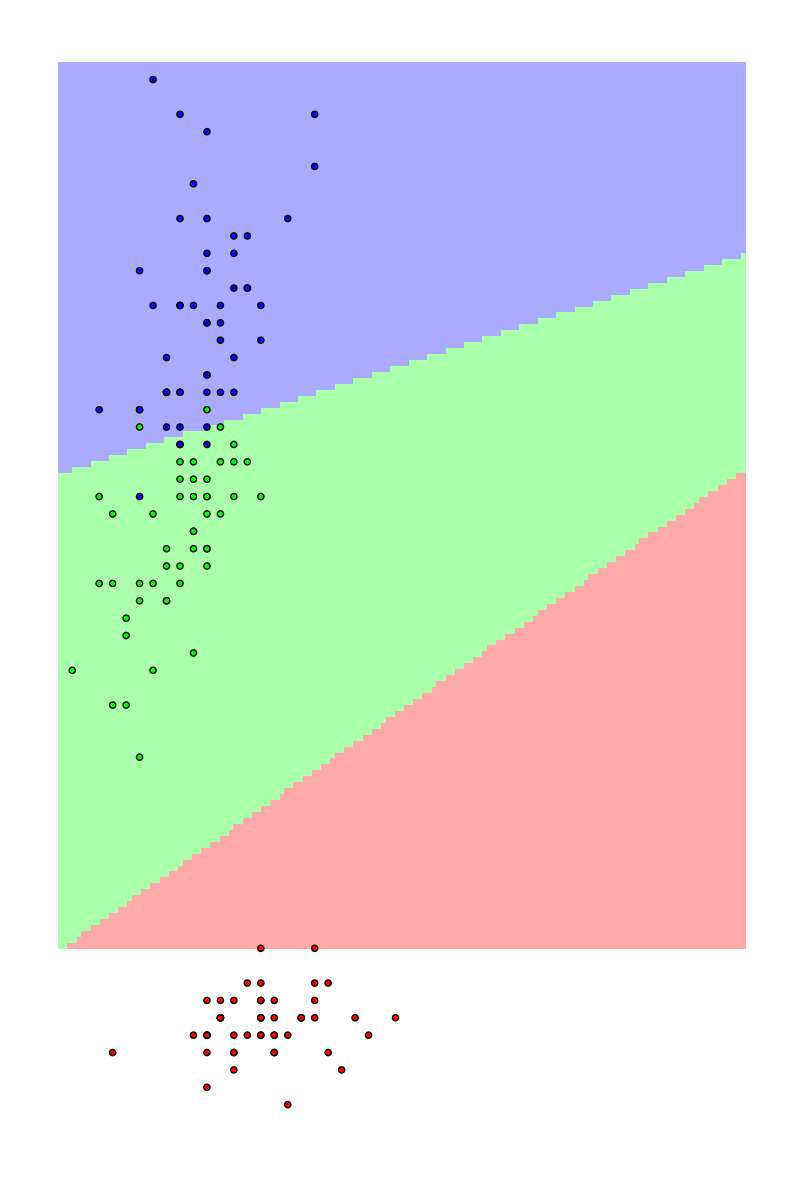

In [27]:
plot_estimator_df(svc, X1, y1)

C:\Users\Mnsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


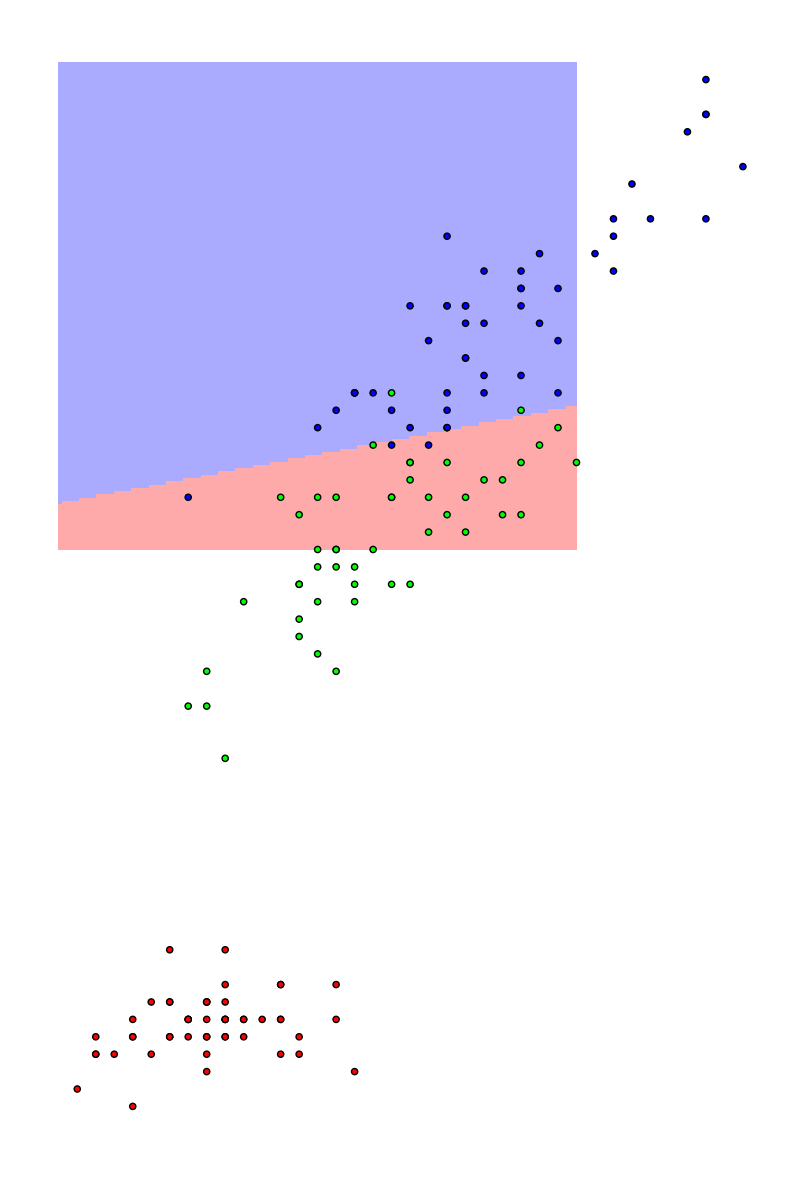

In [113]:
X2=df_iris.ix[0:150,['sep_len', 'pet_len']]
y2=df_iris.ix[0:150, ['target']]
svc.fit(X1, y1)
plot_estimator_df(svc, X2, y2)
#works but not colormesh is not coming around

In [ ]:
#get predictions
#predicted = classifier.predict(X_test)
# get the accuracy
#print accuracy_score(y_test, predicted)